In [6]:
#本文档对数据进行预处理
#划分预测训练集
#进行数据可视化
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

##设置绘图的大小
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

In [7]:
# 导入数据
#选用的服务器类型
columns = ["id","ecs","date","time"]
#读取数据
data = pd.read_table('data_set/data_2015_12_to_2016_01.txt',header=None,delim_whitespace=True,names=columns)
#转化成日期格式
data['date'] = pd.to_datetime(data['date'])
#train['date']=pd.to_datetime(train['date'])  

In [8]:
#对数据进行处理
from sklearn import preprocessing
target_ecs = ["flavor1","flavor2","flavor3","flavor4","flavor5","flavor6","flavor7","flavor8","flavor9","flavor10","flavor11","flavor12","flavor13","flavor14","flavor15"]
#首先对数据进行聚合,统计每一种服务器们每天的个数
groupby_data = data.groupby(["date","ecs"]).size().reset_index(name="count")
#生成一个新的时间序列
begin_date = groupby_data.iloc[0]['date']
end_date = groupby_data.iloc[-1]['date']
full_data = pd.DataFrame(index=pd.date_range(begin_date,end_date))
for ecs_type in target_ecs:
    tmp_data = groupby_data[groupby_data["ecs"]==ecs_type]
    tmp_data = tmp_data.set_index("date")
    tmp_data=tmp_data.drop(['ecs'], axis=1)
    tmp_data.rename(columns={'count':ecs_type}, inplace = True)
    full_data = full_data.join(tmp_data).fillna(0)
#print (full_data.head(10))

            flavor1  flavor2  flavor3  flavor4  flavor5  flavor6  flavor7  \
2015-12-01      3.0     10.0      0.0      2.0      0.0      1.0      0.0   
2015-12-02      6.0      2.0      0.0      0.0      2.0      0.0      0.0   
2015-12-03      2.0      0.0      0.0      0.0      3.0      0.0      1.0   
2015-12-04      2.0      1.0      0.0      0.0      2.0      0.0      0.0   
2015-12-05      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
2015-12-06      3.0      0.0      0.0      1.0      8.0      0.0      2.0   
2015-12-07      4.0      3.0      0.0      2.0      4.0      0.0      6.0   
2015-12-08      7.0      1.0      0.0     18.0      2.0      0.0      2.0   
2015-12-09     26.0      1.0      0.0      1.0      1.0      0.0      2.0   
2015-12-10      3.0      6.0      1.0      0.0      2.0      1.0      1.0   

            flavor8  flavor9  flavor10  flavor11  flavor12  flavor13  \
2015-12-01      3.0      2.0       0.0       0.0       0.0       0.0   
2015-12-

In [12]:
##进行训练集和测试集划分
import datetime
##手动设定训练集和测试集
train_begin_date = datetime.datetime(2015, 12, 1)
train_end_date = datetime.datetime(2016, 1, 22)
test_begin_date = datetime.datetime(2016, 1, 23)
test_end_date = datetime.datetime(2016, 1, 31)
train_data = full_data.iloc[full_data.index >= train_begin_date]
train_data = train_data.iloc[train_data.index <= train_end_date]
test_data = full_data.iloc[full_data.index >= test_begin_date]
test_data = test_data.iloc[test_data.index <= test_end_date]
#print (test_data)

            flavor1  flavor2  flavor3  flavor4  flavor5  flavor6  flavor7  \
2016-01-23      1.0      6.0      8.0      0.0      0.0      0.0      0.0   
2016-01-24      2.0      5.0      0.0      1.0      1.0      0.0      0.0   
2016-01-25      8.0      0.0      0.0      2.0     10.0      0.0      1.0   
2016-01-26      1.0      5.0      2.0      0.0      1.0      0.0      0.0   
2016-01-27      2.0      7.0      1.0      5.0      6.0      0.0      1.0   
2016-01-28      4.0      0.0      0.0      3.0      5.0      1.0      3.0   
2016-01-29      2.0      1.0      0.0      1.0      3.0      1.0      1.0   
2016-01-30      3.0      1.0      0.0      0.0      0.0      0.0      0.0   
2016-01-31      3.0      0.0      0.0      0.0      4.0      0.0      0.0   

            flavor8  flavor9  flavor10  flavor11  flavor12  flavor13  \
2016-01-23     25.0      0.0       0.0       0.0       0.0       0.0   
2016-01-24      7.0      1.0       0.0       2.0       0.0       0.0   
2016-01-25   

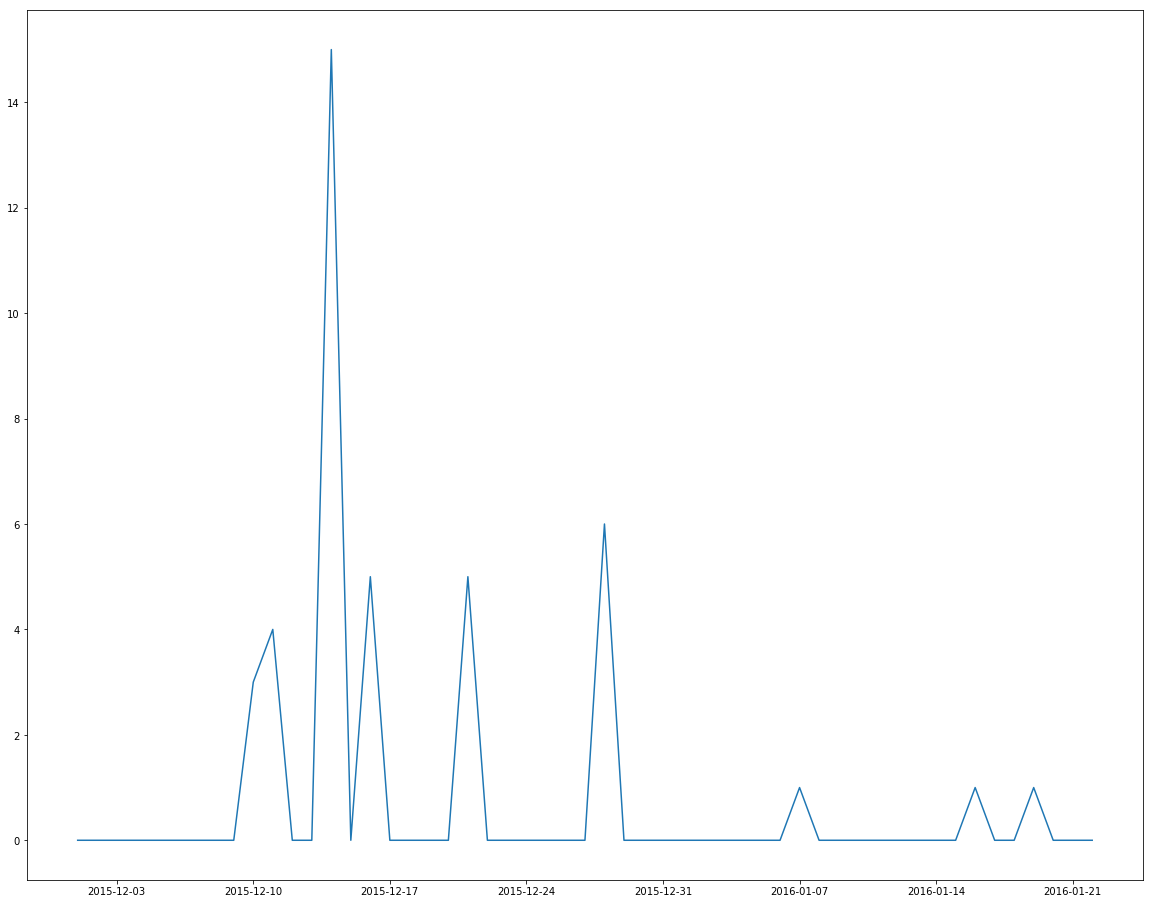

In [28]:
##观察数据集
watch_type = 'flavor15'
watch_data = train_data[watch_type]
plt.plot(watch_data)